In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/envs/work/lib/python3.4/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'tsfc', 
            'pressure_reference_high',
            'temperature_reference_high', 
            'pressure_reference_low', 
            'temperature_reference_low',
            'ighigh', 
            'ng', 
            'absth',
            'wgt']


def pattern_assign(name):
    return ''' 
    parameter .* :: .* ({} .* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/]+ {}[^,] [^/]+ / [^/]+ /)
    '''.format(name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd',
                          'LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band02_wn_340_540',
                          'ng_7/g_ascending',
                          'refPTs_P_500_T_250__P_1_T_250',
                          'ighigh_5',
                          'getabsth_auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_.8_.75_.7_.65_.6__.6_.9',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd',
                          'LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band02_wn_340_540',
                          'ng_7/g_ascending',
                          'refPTs_P_500_T_250__P_1_T_250',
                          'ighigh_5',
                          'getabsth_auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_.8_.75_.7_.65_.6__.6_.9',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 7 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
# print some input parameters

with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 340

nband = 200

nv = 200

dv = 0.005

tsfc = 294.0

pressure_reference_high = 1.

temperature_reference_high = 250.

pressure_reference_low = 500.

temperature_reference_low = 250.

ighigh = 5

ngas = 6      

ng = 7

data absth(:, 1) /

!     thresholds for reference (P, T) low
!     data absth(:, 2) /

data wgt
     &     /.8, .75, .7, .65, .6, .6, .9/

include 'mls75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: flux, cooling rate g-group 1

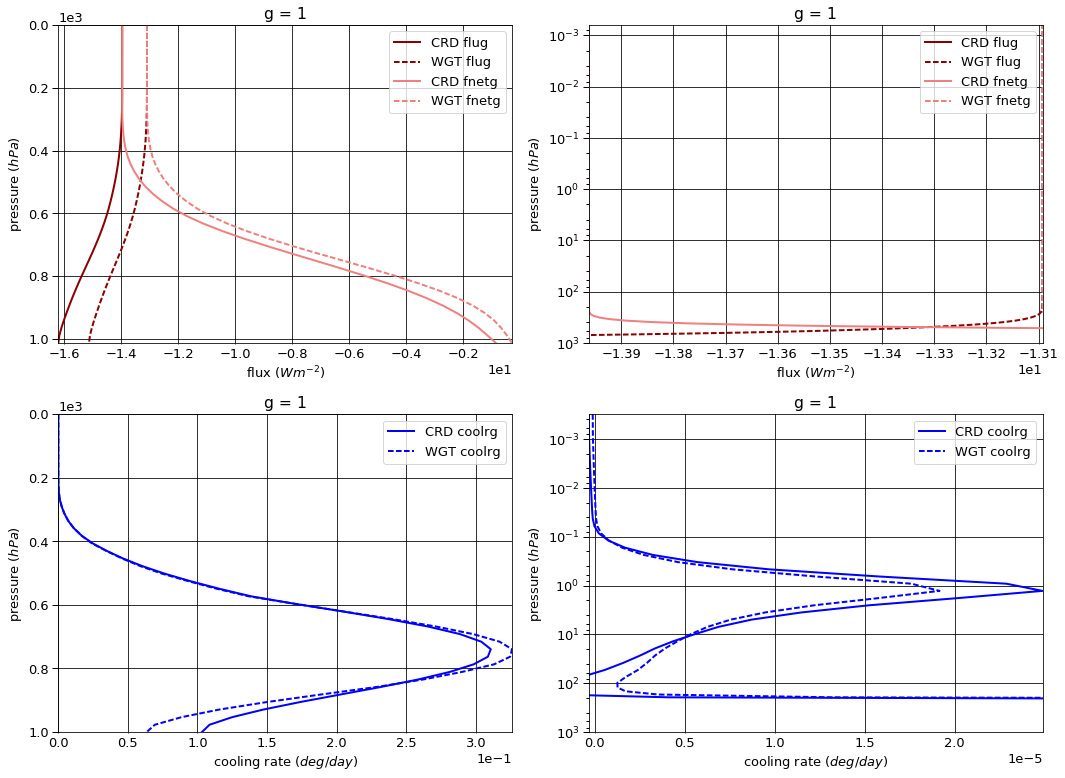

# Figure: flux, cooling rate g-group 2

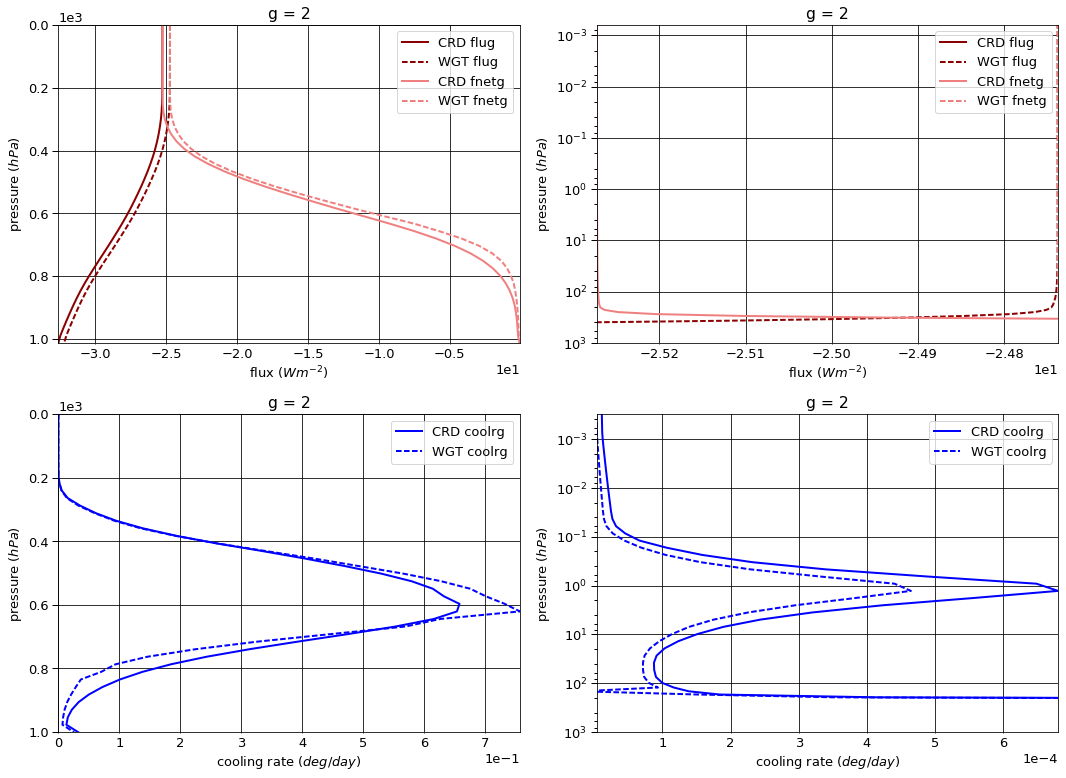

# Figure: flux, cooling rate g-group 3

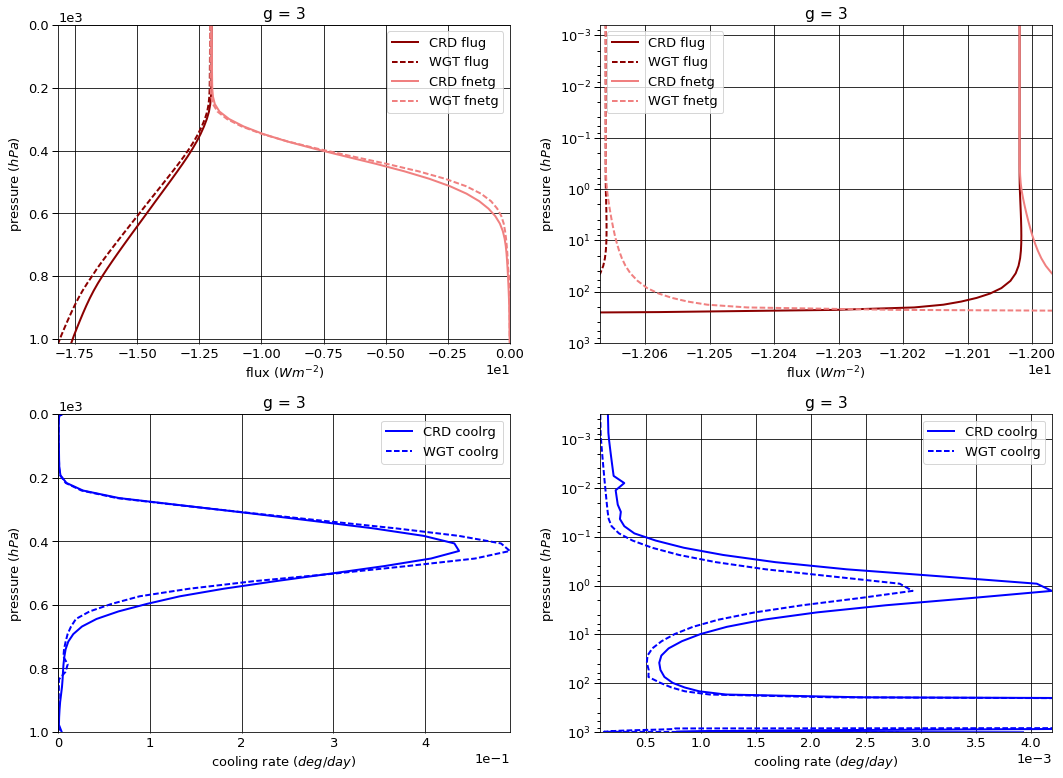

# Figure: flux, cooling rate g-group 4

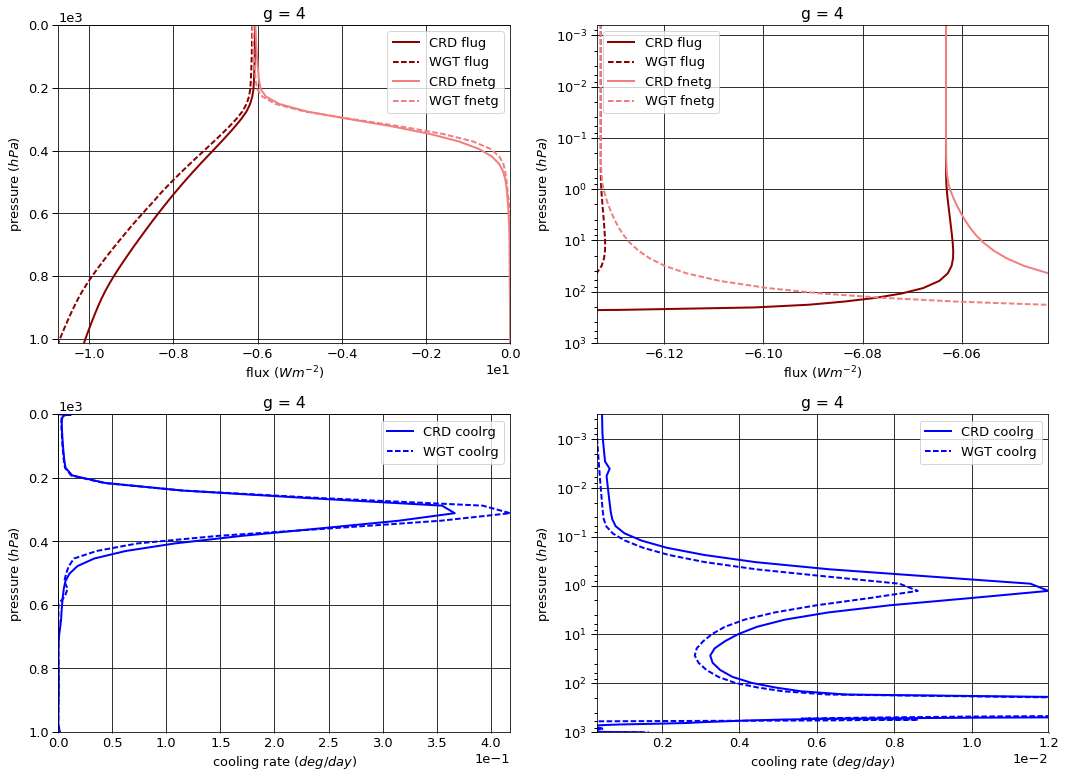

# Figure: flux, cooling rate g-group 5

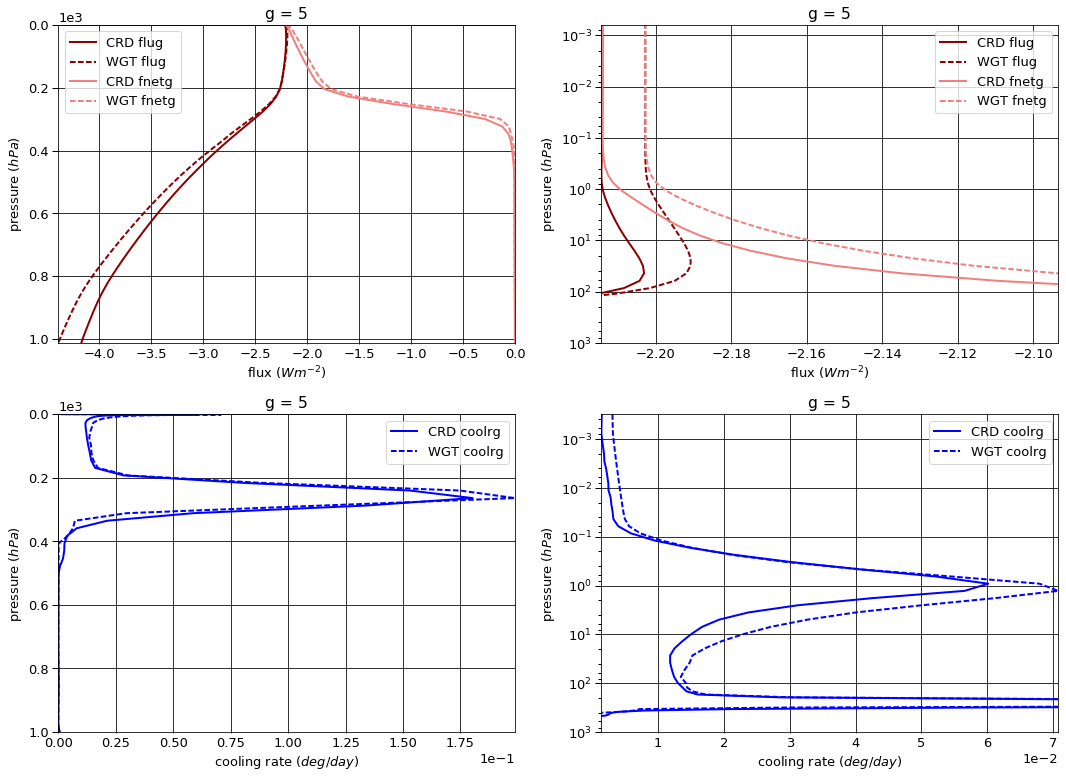

# Figure: flux, cooling rate g-group 6

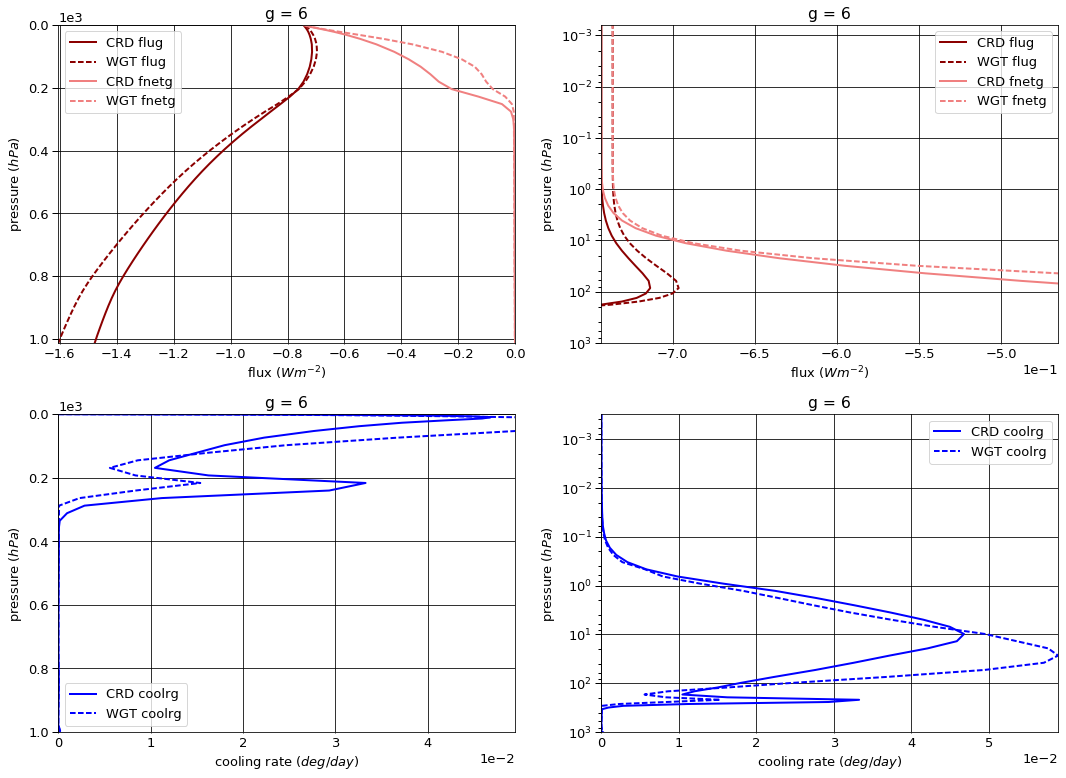

# Figure: flux, cooling rate g-group 7

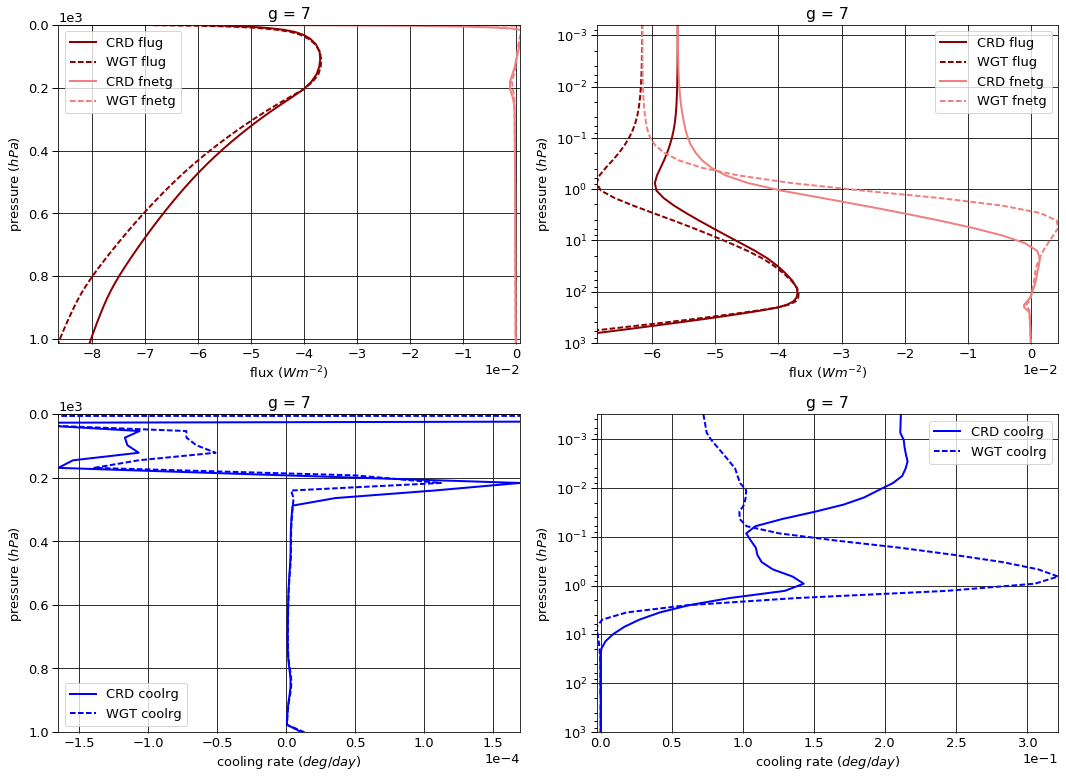

# Figure: flux, cooling rate g-group total

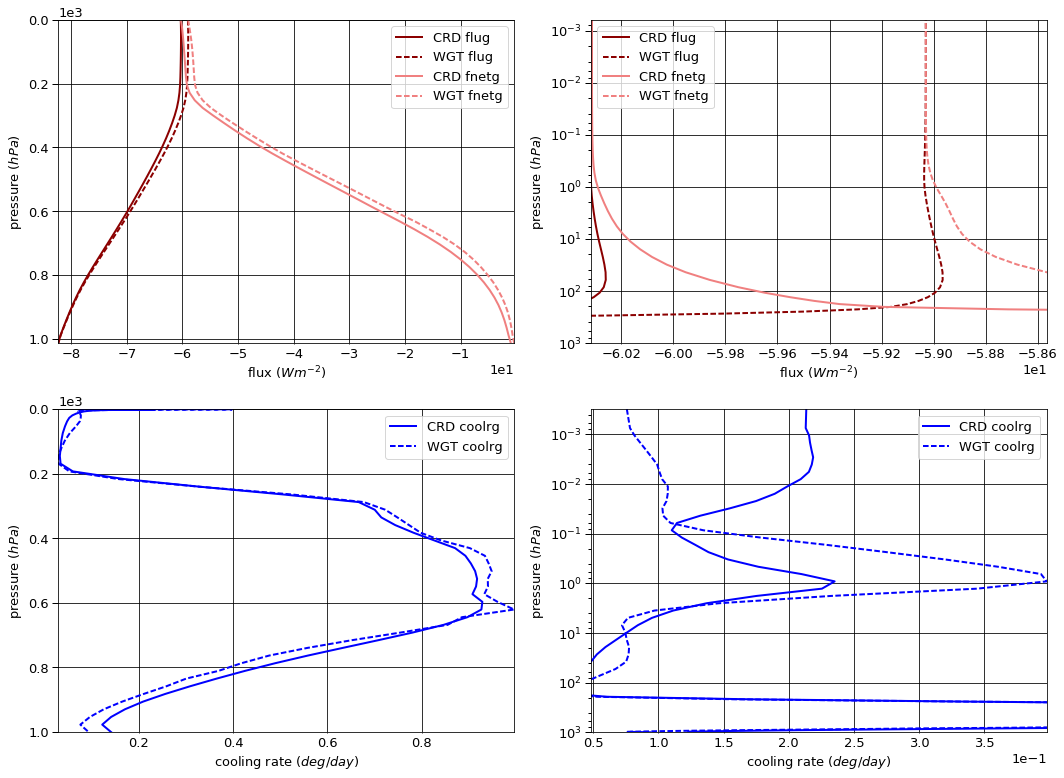

In [16]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [17]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug       fldg      fnetg
g pressure level                                 
1 0.0      1     -13.961931   0.000000 -13.961931
  1013.0   76    -16.202605  15.351374  -0.851232
2 0.0      1     -25.272414   0.000000 -25.272414
  1013.0   76    -32.609759  32.511800  -0.097959
3 0.0      1     -12.001927   0.000000 -12.001927
  1013.0   76    -17.648338  17.638324  -0.010014
4 0.0      1      -6.063168   0.000000  -6.063168
  1013.0   76    -10.123950  10.119902  -0.004048
5 0.0      1      -2.214112   0.000000  -2.214112
  1013.0   76     -4.173315   4.171637  -0.001678
6 0.0      1      -0.743467   0.000000  -0.743467
  1013.0   76     -1.477354   1.476781  -0.000574
7 0.0      1      -0.055925   0.000000  -0.055925
  1013.0   76     -0.080507   0.080475  -0.000032


WGT


flug       fldg      fnetg
g pressure level                                 
1 0.0      1     -13.092436   0.000000 -13.092436
  1013.0   76    -15.125534  14.840746  -0.284788
2 0.0      1     -24.737865   0.000000 -24.737865
  1013.0   76    -32.201952  32.133637  -0.068315
3 0.0      1     -12.066101   0.000000 -12.066101
  1013.0   76    -18.169161  18.161397  -0.007764
4 0.0      1      -6.132830   0.000000  -6.132830
  1013.0   76    -10.733984  10.729397  -0.004587
5 0.0      1      -2.202754   0.000000  -2.202754
  1013.0   76     -4.393607   4.391730  -0.001878
6 0.0      1      -0.736576   0.000000  -0.736576
  1013.0   76     -1.605159   1.604473  -0.000686
7 0.0      1      -0.061533   0.000000  -0.061533
  1013.0   76     -0.086432   0.086395  -0.000037


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1      0.869495  0.000000  0.869495
  1013.0   76     1.077071 -0.510628  0.566444
2 0.0      1      0.534549  0.000000  0.534549
  1013.0   76     0.407807 -0.378163  0.029643
3 0.0      1     -0.064174  0.000000 -0.064174
  1013.0   76    -0.520823  0.523073  0.002249
4 0.0      1     -0.069662  0.000000 -0.069662
  1013.0   76    -0.610034  0.609495 -0.000539
5 0.0      1      0.011357  0.000000  0.011357
  1013.0   76    -0.220292  0.220093 -0.000200
6 0.0      1      0.006891  0.000000  0.006891
  1013.0   76    -0.127804  0.127692 -0.000112
7 0.0      1     -0.005608  0.000000 -0.005608
  1013.0   76    -0.005925  0.005920 -0.000005

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1     -3.237398e-07
  1001.112500 75     1.030524e-01
2 0.000312    1      1.108809e-05
  1001.112500 75     3.286563e-02
3 0.000312    1      1.578501e-04
  1001.112500 75     3.929818e-03
4 0.000312    1      4.465949e-04
  1001.112500 75     1.462356e-03
5 0.000312    1      1.462240e-03
  1001.112500 75     6.060934e-04
6 0.000312    1      2.267737e-05
  1001.112500 75     2.073905e-04
7 0.000312    1      2.113046e-01
  1001.112500 75     1.144705e-05


WGT


coolrg
g pressure    layer              
1 0.000312    1     -1.088659e-07
  1001.112500 75     6.329242e-02
2 0.000312    1      3.486303e-06
  1001.112500 75     2.582694e-02
3 0.000312    1      8.855303e-05
  1001.112500 75     2.804028e-03
4 0.000312    1      3.036898e-04
  1001.112500 75     1.656565e-03
5 0.000312    1      3.090224e-03
  1001.112500 75     6.780609e-04
6 0.000312    1      1.421917e-05
  1001.112500 75     2.477225e-04
7 0.000312    1      7.230616e-02
  1001.112500 75     1.333890e-05


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      2.148739e-07
  1001.112500 75    -3.975997e-02
2 0.000312    1     -7.601784e-06
  1001.112500 75    -7.038684e-03
3 0.000312    1     -6.929703e-05
  1001.112500 75    -1.125790e-03
4 0.000312    1     -1.429051e-04
  1001.112500 75     1.942089e-04
5 0.000312    1      1.627984e-03
  1001.112500 75     7.196759e-05
6 0.000312    1     -8.458198e-06
  1001.112500 75     4.033196e-05
7 0.000312    1     -1.389984e-01
  1001.112500 75     1.891858e-06

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-60.312943,0.000000,-60.312943
1013.0,76,-82.315828,81.350293,-0.965536



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-59.030095,0.000000,-59.030095
1013.0,76,-82.315829,81.947774,-0.368055



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,1.282849e+00,0.000000,1.282849
1013.0,76,-5.740000e-07,0.597482,0.597481


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.213405
1001.112500,75,0.142135



WGT


,,coolrg
pressure,layer,
0.000312,1,0.075806
1001.112500,75,0.094519



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.137598
1001.112500,75,-0.047616


In [18]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.183750,0.188999
2,0.391200,0.395091
3,0.220725,0.217646
4,0.130400,0.126534
5,0.053375,0.052040
6,0.019500,0.018678
7,0.001050,0.001013


In [19]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,2.719672e-23
2,1.859010e-22
3,1.270712e-21
4,8.685856e-21
5,5.937150e-20
6,7.961458e-20


In [20]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')